## ROC / Time Plots for MYBENCH-SINGLE: HMMER vs MMSEQS vs MMORESEQS

## BENCHMARK-SINGLE Dataset

In [1]:
### Imports ###
from __future__ import print_function
import sys
import os
import os.path
import psutil
import math
import numpy as np
import pandas as pd
import cv2 as cv
from PIL import Image
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.pyplot import cm
import statsmodels.api as sm
import statistics as stats

In [2]:
### MatPlotLib settings ###

# number or rows/columns to display
pd.options.display.max_rows = 40
pd.options.display.max_columns = 20

# resolution of output
matplotlib.rcParams['figure.dpi'] = 300

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 7 }

matplotlib.rc('font', **font)


In [3]:
### Root Directory ###

database = "mybench-single"

path_to_db = "data/{}/".format(database)


In [4]:
### Search Data ###

search_list = {}

# HMMER
search_list["HMMER"] = {}
search_list["HMMER"]["norm"]         = True
search_list["HMMER"]["norm-e1e4"]    = True

# MMSEQS
search_list["MMSEQS"] = {}

search_list["MMSEQS"]["norm"]        = True
search_list["MMSEQS"]["norm-max1e3"] = True
search_list["MMSEQS"]["norm-max1e4"] = True

search_list["MMSEQS"]["sens"]        = True
search_list["MMSEQS"]["sens-max1e3"] = True
search_list["MMSEQS"]["sens-max1e4"] = True

search_list["MMSEQS"]["k80-max1e3"] = True
search_list["MMSEQS"]["k70-max1e3"] = True
search_list["MMSEQS"]["k60-max1e3"] = True

# MMORE
search_list["MMORE"] = {}

search_list["MMORE"]["norm-pre"]      = True

search_list["MMORE"]["norm-8A12B"]    = True
search_list["MMORE"]["norm-12A20B"]   = True
search_list["MMORE"]["norm-16A28B"]   = True

search_list["MMORE"]["norm-8A12B-F1"]  = True
search_list["MMORE"]["norm-12A20B-F1"] = True
search_list["MMORE"]["norm-16A28B-F1"] = True

search_list["MMORE"]["norm-8A12B-F2"] = True
search_list["MMORE"]["norm-12A20B-F2"] = True
search_list["MMORE"]["norm-16A28B-F2"] = True

search_list["MMORE"]["norm-8A12B-F3"] = True
search_list["MMORE"]["norm-12A20B-F3"] = True
# search_list["MMORE"]["norm-16A28B-F3"] = True

search_list["MMORE"]["norm-FULL"]     = True
search_list["MMORE"]["norm-FULL-dom"] = True
search_list["MMORE"]["viterbi"]       = True
search_list["MMORE"]["norm-12A16B-ALT3"] = True
search_list["MMORE"]["norm-12A20B-ALT5"] = True

# search_list["MMORE"]["max1e4"]["pre"]    = None
# search_list["MMORE"]["max1e5"]["pre"]    = None
# search_list["MMORE"]["k70"]["pre"]       = None
# search_list["MMORE"]["k60"]["pre"]       = None


In [5]:
### Filepaths ###

fnames = {}

# HMMER
fnames["HMMER"] = {}
fnames["HMMER"]["norm"]         = "{}/hmmer.mybench-single.508HMM.tf".format(path_to_db)
fnames["HMMER"]["norm-e1e4"]    = "{}/hmmer.mybench-single.507HMM.tf".format(path_to_db)

# MMSEQS
fnames["MMSEQS"] = {}

fnames["MMSEQS"]["norm"]        = "{}/mmseqs.mybench-single.201MSQ.tf".format(path_to_db)
fnames["MMSEQS"]["norm-max1e3"] = "{}/mmseqs.mybench-single.301MSQ.tf".format(path_to_db)
fnames["MMSEQS"]["norm-max1e4"] = "{}/mmseqs.mybench-single.401MSQ.tf".format(path_to_db)

fnames["MMSEQS"]["sens"]        = "{}/mmseqs.mybench-single.202MSQ.tf".format(path_to_db)
fnames["MMSEQS"]["sens-max1e3"] = "{}/mmseqs.mybench-single.302MSQ.tf".format(path_to_db)
fnames["MMSEQS"]["sens-max1e4"] = "{}/mmseqs.mybench-single.402MSQ.tf".format(path_to_db)

fnames["MMSEQS"]["k80-max1e3"] = "{}/mmseqs.mybench-single.518MSQ.tf".format(path_to_db)
fnames["MMSEQS"]["k70-max1e3"] = "{}/mmseqs.mybench-single.517MSQ.tf".format(path_to_db)
fnames["MMSEQS"]["k60-max1e3"] = "{}/mmseqs.mybench-single.516MSQ.tf".format(path_to_db)

# MMORE
fnames["MMORE"] = {}

fnames["MMORE"]["norm-pre"]      = "{}/mmseqs.mybench-single.507MRS.tf".format(path_to_db)

fnames["MMORE"]["norm-8A12B"]    = "{}/mmoreseqs.mybench-single.501A.8.12.tf".format(path_to_db)
fnames["MMORE"]["norm-12A20B"]   = "{}/mmoreseqs.mybench-single.501A.12.20.tf".format(path_to_db)
fnames["MMORE"]["norm-16A28B"]   = "{}/mmoreseqs.mybench-single.501A.16.28.tf".format(path_to_db)

fnames["MMORE"]["norm-8A12B-F1"]  = "{}/mmoreseqs.mybench-single.516A.8.12.tf".format(path_to_db)
fnames["MMORE"]["norm-12A20B-F1"] = "{}/mmoreseqs.mybench-single.516A.12.20.tf".format(path_to_db)
fnames["MMORE"]["norm-16A28B-F1"] = "{}/mmoreseqs.mybench-single.516A.16.28.tf".format(path_to_db)

fnames["MMORE"]["norm-8A12B-F2"]  = "{}/mmoreseqs.mybench-single.520A.8.12.tf".format(path_to_db)
fnames["MMORE"]["norm-12A20B-F2"] = "{}/mmoreseqs.mybench-single.520A.12.20.tf".format(path_to_db)
fnames["MMORE"]["norm-16A28B-F2"] = "{}/mmoreseqs.mybench-single.520A.16.28.tf".format(path_to_db)

fnames["MMORE"]["norm-8A12B-F3"]  = "{}/mmoreseqs.mybench-single.MMR600.8.12.tf".format(path_to_db)
fnames["MMORE"]["norm-12A20B-F3"] = "{}/mmoreseqs.mybench.MMR600.12.20.tf".format(path_to_db)
# fnames["MMORE"]["norm-16A28B-F3"] = "{}/mmoreseqs.mybench-single.520A.16.28.tf".format(path_to_db)

fnames["MMORE"]["norm-FULL"]     = "{}/mmoreseqs.mybench-single.510MF.full.tf".format(path_to_db)
fnames["MMORE"]["norm-FULL-dom"] = "{}/mmoreseqs.mybench-single.510MF.full.dom.tf".format(path_to_db)
fnames["MMORE"]["viterbi"]       = "{}/mmoreseqs.mybench-single.MMR701.mmore-vit.tf".format(path_to_db)
fnames["MMORE"]["norm-12A16B-ALT3"] = "{}/mmoreseqs.mybench-single.MMR701.alt3.tf".format(path_to_db)
fnames["MMORE"]["norm-12A20B-ALT5"] = "{}/mmoreseqs.mybench-single.MMR702.alt5.tf".format(path_to_db)

# fnames["MMORE"]["max1e4"]["pre"]    = None
# fnames["MMORE"]["max1e5"]["pre"]    = None
# fnames["MMORE"]["k70"]["pre"]       = None
# fnames["MMORE"]["k60"]["pre"]       = None


In [6]:
### Titles ###

titles = {}

# HMMER
titles["HMMER"] = {}
titles["HMMER"]["norm"]         = "HMMER"
titles["HMMER"]["norm-e1e4"]    = "HMMER"

# MMSEQS
titles["MMSEQS"] = {}

titles["MMSEQS"]["norm"]        = "MMSeqs2"
titles["MMSEQS"]["norm-max1e3"] = "MMSeqs2 (normal, maxseqs=1e3)"
titles["MMSEQS"]["norm-max1e4"] = "MMSeqs2 (normal, maxseqs=1e4)"

titles["MMSEQS"]["sens"]        = "MMSeqs2 (sensitive)"
titles["MMSEQS"]["sens-max1e3"] = "MMSeqs2 (sensitive, maxseqs=1e3)"
titles["MMSEQS"]["sens-max1e4"] = "MMSeqs2 (sensitive, maxseqs=1e4)"

titles["MMSEQS"]["k80-max1e3"]  = "MMSeqs2 (kscore=80, maxseqs=1e3)"
titles["MMSEQS"]["k70-max1e3"]  = "MMSeqs2 (kscore=70, maxseqs=1e3)"
titles["MMSEQS"]["k60-max1e3"]  = "MMSeqs2 (kscore=60, maxseqs=1e3)"

# MMORE
titles["MMORE"] = {}

# MMSEQS normal filter
titles["MMORE"]["norm-pre"]       = "MMore (MMSeqs2 filter)"

titles["MMORE"]["norm-8A12B"]     = "MMore (α=8,β=12)"
titles["MMORE"]["norm-12A20B"]    = "MMore (α=12,β=20)"
titles["MMORE"]["norm-16A28B"]    = "MMore (α=16,β=28)"

titles["MMORE"]["norm-8A12B-F1"]  = "MMore (α=8,β=12,  filters:fwd=1e-5)"
titles["MMORE"]["norm-12A20B-F1"] = "MMore (α=12,β=20, filters:fwd=1e-5)"
titles["MMORE"]["norm-16A28B-F1"] = "MMore (α=16,β=28, filters:fwd=1e-5)"

titles["MMORE"]["norm-8A12B-F2"]  = "MMore (α=8,β=12,  filters:fwd=1e-4,cld=1e-3)"
titles["MMORE"]["norm-12A20B-F2"] = "MMore (α=12,β=20, filters:fwd=1e-4,cld=1e-3)"
titles["MMORE"]["norm-16A28B-F2"] = "MMore (α=16,β=28, filters:fwd=1e-4,cld=1e-3)"

titles["MMORE"]["norm-8A12B-F3"]  = "MMore (M2M) (α=8,β=12,  filters:fwd=1e-4,cld=1e-3)"
titles["MMORE"]["norm-12A20B-F3"] = "MMore (M2M) (α=12,β=20, filters:fwd=1e-4,cld=1e-3)"
# titles["MMORE"]["norm-16A28B-F3"] = "MMore (α=16,β=28, filters:fwd=1e-4,cld=1e-3)"

titles["MMORE"]["norm-FULL"]      = "MMore (FULL)"
titles["MMORE"]["norm-FULL-dom"]  = "MMore (FULL-dom)"
titles["MMORE"]["viterbi"]        = "MMore (Viterbi)"
titles["MMORE"]["norm-12A16B-ALT3"] = "MMore (α=12,β=16, altalis=3, filters:fwd=1e-4,cld=1e-3)"
titles["MMORE"]["norm-12A20B-ALT5"] = "MMore (α=12,β=20, altalis=5, filters:fwd=1e-4,cld=1e-3)"

# titles["MMORE"]["max1e4"]["pre"]  = "MMore (MMSeqs2 filter, maxseqs=1e4)"
# titles["MMORE"]["max1e5"]["pre"]  = "MMore (MMSeqs2 filter, maxseqs=1e5)"
# titles["MMORE"]["k70"]["pre"]     = "MMore (MMSeqs2 filter, kscore=70)"
# titles["MMORE"]["k60"]["pre"]     = "MMore (MMSeqs2 filter, kscore=60)"


In [7]:
### Commands ###

commands = {}

# HMMER
commands["HMMER"] = {}
commands["HMMER"]["norm"]         = "hmmsearch"
commands["HMMER"]["norm"]         = "hmmsearch (default)"
commands["HMMER"]["norm-e1e4"]    = "hmmsearch -E 2.1e4"

# MMSEQS
commands["MMSEQS"] = {}

commands["MMSEQS"]["norm"]        = "mmseqs (default; note: no false positives)"
commands["MMSEQS"]["norm-max1e3"] = "mmseqs --max-seqs 1e3"
commands["MMSEQS"]["norm-max1e4"] = "mmseqs --max-seqs 1e4"

commands["MMSEQS"]["sens"]        = "mmseqs -s 7.5"
commands["MMSEQS"]["sens-max1e3"] = "mmseqs -s 7.5 --max-seqs 1e3"
# commands["MMSEQS"]["sens-max1e4"] = "mmseqs -s 7.5 --max-seqs 1e4"
commands["MMSEQS"]["sens-max1e4"] = "mmseqs -s 7.5 --max-seqs 1e4 (high sensitivity)"

commands["MMSEQS"]["k80-max1e3"]  = "mmseqs --k-score 80 --max-seqs 1e3"
commands["MMSEQS"]["k70-max1e3"]  = "mmseqs --k-score 70 --max-seqs 1e3"
commands["MMSEQS"]["k60-max1e3"]  = "mmseqs --k-score 60 --max-seqs 1e3"

# MMORE
commands["MMORE"] = {}

# MMSEQS normal filter
# commands["MMORE"]["norm-pre"]       = "mmoreseqs prep-search --run-mmore 0"
commands["MMORE"]["norm-pre"]       = "mmoreseqs prep-search --run-mmore 0 (report MMseqs Viterbi scores)"

commands["MMORE"]["norm-8A12B"]     = "mmoreseqs prep-search --alpha 8 --beta 12"
commands["MMORE"]["norm-12A20B"]    = "mmoreseqs prep-search --alpha 12 --beta 20"
commands["MMORE"]["norm-16A28B"]    = "mmoreseqs prep-search --alpha 16 --beta 28"

commands["MMORE"]["norm-8A12B-F1"]  = "mmoreseqs prep-search --alpha 8 --beta 12 --fwd-filter 1e-5"
commands["MMORE"]["norm-12A20B-F1"] = "mmoreseqs prep-search --alpha 12 --beta 20 --fwd-filter 1e-5"
commands["MMORE"]["norm-16A28B-F1"] = "mmoreseqs prep-search --alpha 16 --beta 28 --fwd-filter 1e-5"

# commands["MMORE"]["norm-8A12B-F2"]  = "mmoreseqs prep-search --alpha 8 --beta 12 --fwd-filter 1e-4 --cld-filter 1e-3" 
commands["MMORE"]["norm-8A12B-F2"]  = "mmoreseqs prep-search --alpha 8 --beta 12" 
# commands["MMORE"]["norm-12A20B-F2"] = "mmoreseqs prep-search --alpha 12 --beta 20 --fwd-filter 1e-4 --cld-filter 1e-3" 
commands["MMORE"]["norm-12A20B-F2"] = "mmoreseqs prep-search (default settings: α=12, β=20)"
# commands["MMORE"]["norm-16A28B-F2"] = "mmoreseqs prep-search --alpha 16 --beta 28 --fwd-filter 1e-4 --cld-filter 1e-3" 
commands["MMORE"]["norm-16A28B-F2"] = "mmoreseqs prep-search --alpha 16 --beta 28" 

commands["MMORE"]["norm-8A12B-F3"]  = "mmoreseqs prep-search --alpha 8 --beta 12" 
commands["MMORE"]["norm-12A20B-F3"] = "mmoreseqs prep-search --alpha 12 --beta 20 (default)"
# commands["MMORE"]["norm-16A28B-F3"] = "mmoreseqs (M2M) prep-search --alpha 16 --beta 28"

commands["MMORE"]["norm-FULL"]      = "mmoreseqs prep-search --run-full 1 (fill entire Forward/Backward matrix)"
commands["MMORE"]["norm-FULL-dom"]  = "mmoreseqs prep-search --run-full 1 (fill entire Forward/Backward matrix)"
commands["MMORE"]["viterbi"]        = "mmoreseqs prep-search --run-vit-mmore 1 (fill Viterbi with HMMER-pHMM)"
commands["MMORE"]["norm-12A16B-ALT3"] = "mmoreseqs prep-search --alpha 12 --beta 16 --altalis 3"
commands["MMORE"]["norm-12A20B-ALT5"] = "mmoreseqs prep-search --alpha 12 --beta 20 --altalis 5"

# commands["MMORE"]["max1e4"]["pre"]  = "mmoreseqs prep-search --run-mmore 0 --mmseqs-hits-per-search 1e4"
# commands["MMORE"]["max1e5"]["pre"]  = "mmoreseqs prep-search --run-mmore 0 --mmseqs-hits-per-search 1e5"
# commands["MMORE"]["k70"]["pre"]     = "mmoreseqs prep-search --run-mmore 0 --mmseqs-kscore 70"
# commands["MMORE"]["k60"]["pre"]     = "mmoreseqs prep-search --run-mmore 0 --mmseqs-kscore 60"


In [8]:
### Runtimes ###
times = {}

# HMMER
times["HMMER"] = {}

times["HMMER"]["norm"]       = 96478.76
times["HMMER"]["norm-e1e4"]  = 84559.01

# MMSEQS
times["MMSEQS"] = {}

times["MMSEQS"]["norm"]        =   694.49
times["MMSEQS"]["norm-max1e3"] =   619.62
times["MMSEQS"]["norm-max1e4"] =  6275.00

times["MMSEQS"]["sens"]        =   909.84
times["MMSEQS"]["sens-max1e3"] =   943.83
times["MMSEQS"]["sens-max1e4"] =  1661.32

times["MMSEQS"]["k80-max1e3"]  =  1828
times["MMSEQS"]["k70-max1e3"]  =  3905
times["MMSEQS"]["k60-max1e3"]  =  7432

# MMSEQS
times["MMORE"] = {}

times["MMORE"]["norm-pre"]       = 1933.28
mmore_pre                        = times["MMORE"]["norm-pre"]

times["MMORE"]["norm-8A12B"]     =  7640.32 + mmore_pre
times["MMORE"]["norm-12A20B"]    = 14343.39 + mmore_pre
times["MMORE"]["norm-16A28B"]    = 17108.88 + mmore_pre

times["MMORE"]["norm-8A12B-F1"]  = 3238.52  + mmore_pre
times["MMORE"]["norm-12A20B-F1"] = 5881.908 + mmore_pre
times["MMORE"]["norm-16A28B-F1"] = 6480.92  + mmore_pre

times["MMORE"]["norm-8A12B-F2"]  = 2151.91  + mmore_pre
times["MMORE"]["norm-12A20B-F2"] = 3224.505 + mmore_pre
times["MMORE"]["norm-16A28B-F2"] = 3582.53  + mmore_pre

times["MMORE"]["norm-8A12B-F3"]  = 1785.451 + mmore_pre
times["MMORE"]["norm-12A20B-F3"] = 2664.502 + mmore_pre
# times["MMORE"]["norm-16A28B-F3"] = 3582.53  + mmore_pre

times["MMORE"]["norm-FULL"]      = 136422.63 + mmore_pre
times["MMORE"]["norm-FULL-dom"]  = 167219.86 + mmore_pre
times["MMORE"]["viterbi"]        = 0.0 + mmore_pre
times["MMORE"]["norm-12A16B-ALT3"]  = 1745.96 + mmore_pre
times["MMORE"]["norm-12A20B-ALT5"]  = 2018.81 + mmore_pre


In [9]:
### Counts ###

# Total Queries and Targets
total_target       =   2035456
total_query        =      3003
total_target_real  =     35456 
total_target_decoy =   2000000

# Total True Positives and Negatives
total_res          = 6057315264
total_TP           =      35456
total_TN           = 6006000000
unknown            =  106438912


# Load Data

### ROC Plots

In [10]:
my_datas = {}

labels = []
datas = []
runtimes = []
cmds = []

lookup     = []
rev_lookup = {}

# set header format
tf_dformat = {
    "target_name": "str",
    "query_name": "str",
    "eval": "float",
    "truth": "str",
    "tot_T": "int",
    "tot_F": "int",
    "tot_?": "int"
}
tf_header = tf_dformat.keys()

# load data
usecols = [0,1,2,3,4,5]
skiprows = None
sep = " "
names = tf_header


In [11]:
tools = search_list.keys()
cnt = 0

for tool in tools:
    print("TOOL:", tool)
    my_datas[tool] = {}
    searches = search_list[tool].keys()
    
    for search in searches:
        print("SEARCH:", search)
        fname = fnames[tool][search]
        
        if search_list[tool][search] == True:
            data = pd.read_csv( fname, sep=sep, header=None, skiprows=skiprows, usecols=usecols, names=names, index_col=False, verbose=False )
            my_datas[tool][search] = data
        
            datas.append( my_datas[tool][search] )
            labels.append( titles[tool][search] )
            runtimes.append( times[tool][search] )
            cmds.append( commands[tool][search] )
            lookup.append( (tool, search) )
            rev_lookup[(tool, search)] = cnt
            cnt += 1
        

TOOL: HMMER
SEARCH: norm
SEARCH: norm-e1e4
TOOL: MMSEQS
SEARCH: norm
SEARCH: norm-max1e3
SEARCH: norm-max1e4
SEARCH: sens
SEARCH: sens-max1e3
SEARCH: sens-max1e4
SEARCH: k80-max1e3
SEARCH: k70-max1e3
SEARCH: k60-max1e3
TOOL: MMORE
SEARCH: norm-pre
SEARCH: norm-8A12B
SEARCH: norm-12A20B
SEARCH: norm-16A28B
SEARCH: norm-8A12B-F1
SEARCH: norm-12A20B-F1
SEARCH: norm-16A28B-F1
SEARCH: norm-8A12B-F2
SEARCH: norm-12A20B-F2
SEARCH: norm-16A28B-F2
SEARCH: norm-8A12B-F3
SEARCH: norm-12A20B-F3
SEARCH: norm-FULL
SEARCH: norm-FULL-dom
SEARCH: viterbi
SEARCH: norm-12A16B-ALT3
SEARCH: norm-12A20B-ALT5


In [12]:
my_data = datas[20]
print( my_data[ my_data["truth"] == "F"] )


       target_name    query_name      eval truth  tot_T  tot_F
14114       RhoGEF  decoy1313680  0.000482     F  13003      1
14514   MscS_porin  decoy1959781  0.001650     F  13335      2
14666       12TM_1   decoy837752  0.002660     F  13443      3
14834     Toxin_10   decoy942173  0.004140     F  13576      4
14835      DUF4220   decoy171800  0.004160     F  13576      5
...            ...           ...       ...   ...    ...    ...
16893      Cas9_PI   decoy714916  6.790000     F  14796    238
16897        IPP-2  decoy1442382  7.840000     F  14797    239
16899     KIAA1430  decoy1928295  7.920000     F  14798    240
16902        KBP_C   decoy171712  8.820000     F  14800    241
16903  Flagellin_N  decoy1586045  9.700000     F  14800    242

[242 rows x 6 columns]


In [13]:
for data in datas:
    
    data["roc_x"] = data["tot_F"] / total_query
    data["roc_y"] = data["tot_T"] / total_TP
    

In [14]:
# find first false positive
auc_ffps = []

for data in datas:
    my_ffp = data[ data["tot_F"] > 0 ]
    
    if ( len(my_ffp) > 0):
        ffp = ( my_ffp.iloc[0]["roc_x"], my_ffp.iloc[0]["roc_y"] )
    else:
        ffp = ( 1/total_query, data.iloc[-1]["roc_y"] )
    auc_ffps.append(ffp)

print("len:", len(auc_ffps))
print(auc_ffps)

len: 28
[(0.000333000333000333, 0.48414936823104693), (0.000333000333000333, 0.48414936823104693), (0.000333000333000333, 0.15049638989169675), (0.000333000333000333, 0.16485221119133575), (0.000333000333000333, 0.16677008122743683), (0.000333000333000333, 0.17576714801444043), (0.000333000333000333, 0.19579196750902528), (0.000333000333000333, 0.1996841155234657), (0.000333000333000333, 0.20380189530685922), (0.000333000333000333, 0.1973995938628159), (0.000333000333000333, 0.1769235108303249), (0.000333000333000333, 0.20380189530685922), (0.000333000333000333, 0.3431577166064982), (0.000333000333000333, 0.3643388989169675), (0.000333000333000333, 0.3668490523465704), (0.000333000333000333, 0.34296028880866425), (0.000333000333000333, 0.36428249097472926), (0.000333000333000333, 0.36673623646209386), (0.000333000333000333, 0.3428474729241877), (0.000333000333000333, 0.3642542870036101), (0.000333000333000333, 0.36673623646209386), (0.000333000333000333, 0.34707806859205775), (0.000333

In [15]:
# 1% false discovery 
auc_fdrs = []

for data in datas:
    my_fdr = data[ ( data["tot_F"]/(data["tot_T"] + data["tot_F"]) ) > 0.01 ]
    
    if ( len(my_fdr) > 1):
        fdr = ( my_fdr.iloc[0]["roc_x"], my_fdr.iloc[0]["roc_y"] ) 
    else:
        fdr = ( -np.inf, -np.inf )
    auc_fdrs.append(fdr)
    
print("len:", len(auc_fdrs))
print(auc_fdrs)

len: 28
[(0.07092907092907093, 0.5934679602888087), (0.07092907092907093, 0.5934679602888087), (-inf, -inf), (0.026307026307026308, 0.2199345667870036), (0.027306027306027308, 0.22348826714801445), (-inf, -inf), (0.03263403263403263, 0.27182987364620936), (0.03396603396603397, 0.2804884927797834), (0.03463203463203463, 0.288639440433213), (0.03396603396603397, 0.28333709386281586), (0.030969030969030968, 0.2567971570397112), (0.03463203463203463, 0.288639440433213), (0.04795204795204795, 0.39764778880866425), (0.04928404928404929, 0.41115749097472926), (0.04995004995004995, 0.41352662454873645), (-inf, -inf), (-inf, -inf), (-inf, -inf), (0.047619047619047616, 0.39739395306859204), (0.04928404928404929, 0.41115749097472926), (0.049617049617049616, 0.4135830324909747), (0.04795204795204795, 0.4005810018050541), (0.049617049617049616, 0.41344201263537905), (0.05028305028305028, 0.41987251805054154), (0.05094905094905095, 0.41803925992779783), (0.04828504828504829, 0.40472698555956677), (0

In [16]:
# TPs Total
my_tps = []

for data in datas:
    tps = data.iloc[-1]["tot_T"]
    my_tps.append(tps)

    
print("len:", len(my_tps))
print(my_tps)

len: 28
[24334, 24817, 5336, 11193, 11611, 6232, 14893, 16338, 16278, 16241, 14791, 16299, 16299, 16299, 16299, 13740, 14280, 14381, 14217, 14724, 14800, 14352, 14802, 16299, 16299, 16267, 14801, 14848]


# Plots

In [17]:
for i in range(len(lookup)):
    print(i, lookup[i])

0 ('HMMER', 'norm')
1 ('HMMER', 'norm-e1e4')
2 ('MMSEQS', 'norm')
3 ('MMSEQS', 'norm-max1e3')
4 ('MMSEQS', 'norm-max1e4')
5 ('MMSEQS', 'sens')
6 ('MMSEQS', 'sens-max1e3')
7 ('MMSEQS', 'sens-max1e4')
8 ('MMSEQS', 'k80-max1e3')
9 ('MMSEQS', 'k70-max1e3')
10 ('MMSEQS', 'k60-max1e3')
11 ('MMORE', 'norm-pre')
12 ('MMORE', 'norm-8A12B')
13 ('MMORE', 'norm-12A20B')
14 ('MMORE', 'norm-16A28B')
15 ('MMORE', 'norm-8A12B-F1')
16 ('MMORE', 'norm-12A20B-F1')
17 ('MMORE', 'norm-16A28B-F1')
18 ('MMORE', 'norm-8A12B-F2')
19 ('MMORE', 'norm-12A20B-F2')
20 ('MMORE', 'norm-16A28B-F2')
21 ('MMORE', 'norm-8A12B-F3')
22 ('MMORE', 'norm-12A20B-F3')
23 ('MMORE', 'norm-FULL')
24 ('MMORE', 'norm-FULL-dom')
25 ('MMORE', 'viterbi')
26 ('MMORE', 'norm-12A16B-ALT3')
27 ('MMORE', 'norm-12A20B-ALT5')


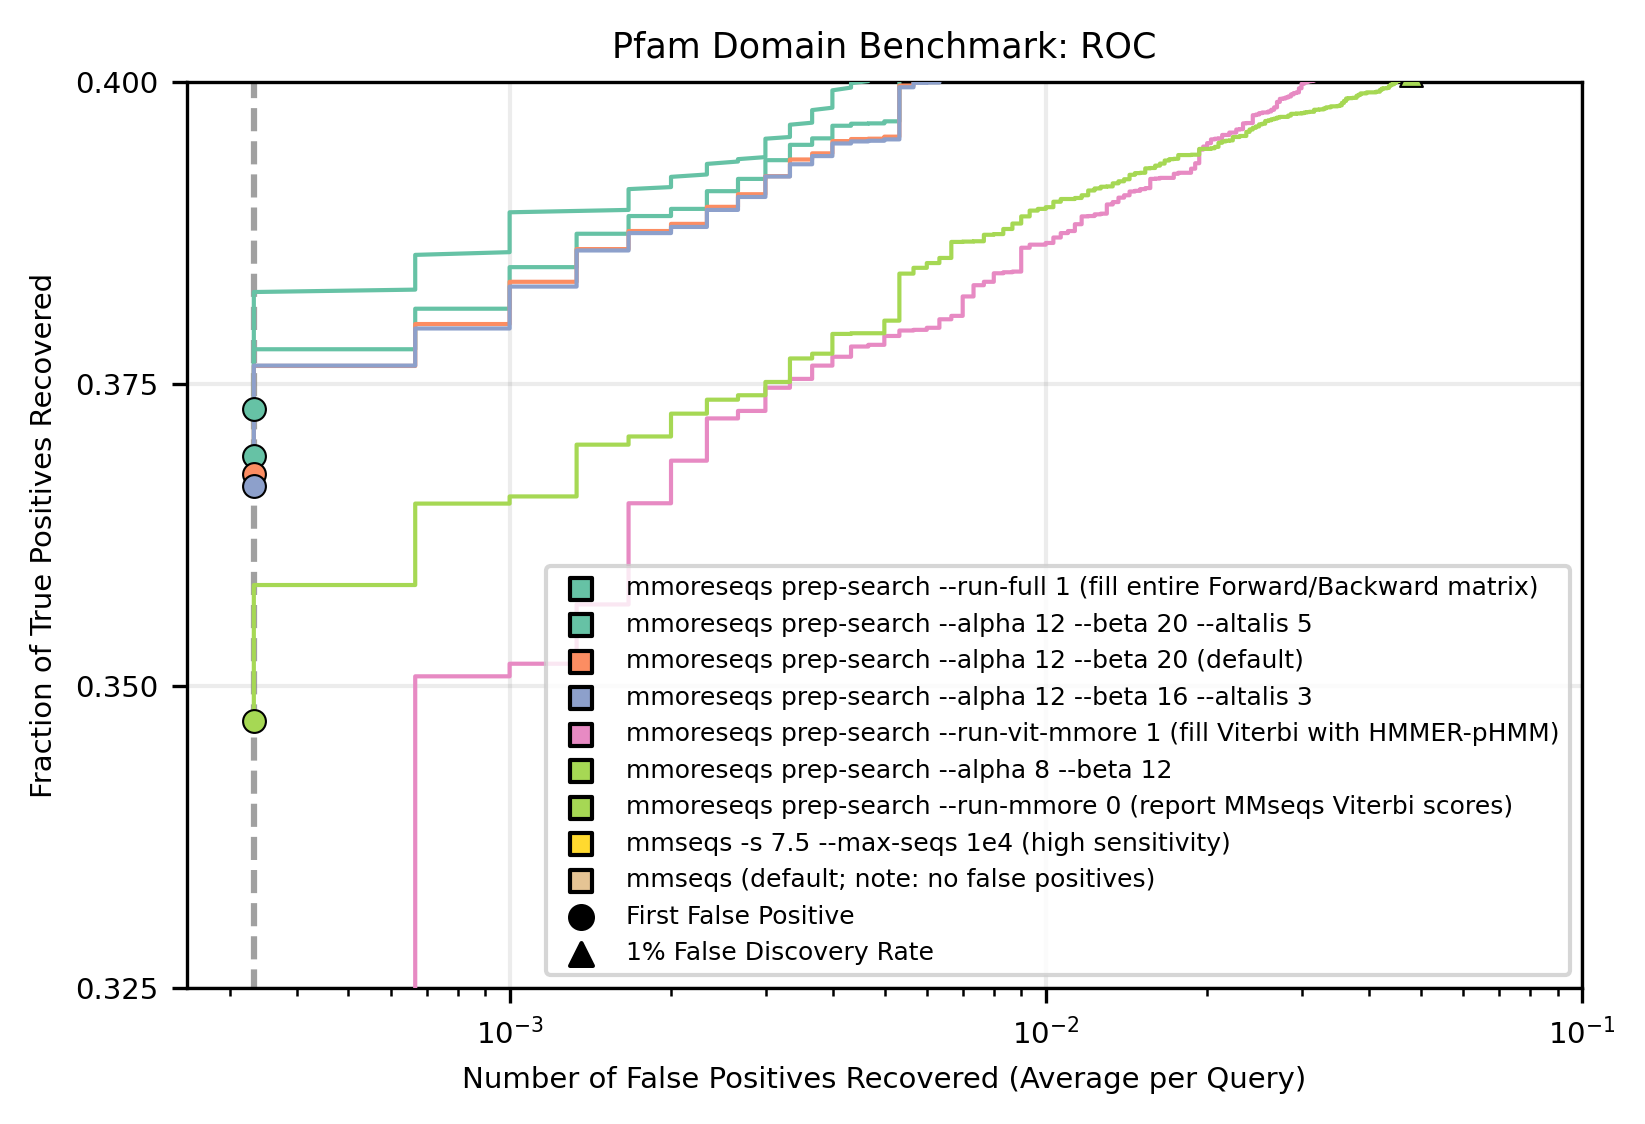

In [22]:
# select which to graph
# search_ids = [0,21,13,19,11,7,2]
# search_ids = [23, 19,18, 21,22, 11,7, 2]
search_ids = [23, 27, 22, 26,25, 21, 11,7, 2]
# search_ids = [21,19,18,11,7,2]

# labels
matplotlib.rcParams.update({'font.size': 7})
plt.title('Pfam Domain Benchmark: ROC')
plt.ylabel('Fraction of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered (Average per Query)')
matplotlib.rcParams.update({'font.size': 6})

# first false positive
plt.plot( [1/total_query, 1/total_query], [-1, 2], color='gray', linewidth='1.5', linestyle='--', alpha=0.75, zorder=0 )

# total mmseqs prefilter TPs
plt.plot( [0, 1e10], [16299/total_TP, 16299/total_TP], color='pink', linewidth='1.5', linestyle='--', alpha=1.0 )

# # 1% false discovery rate (fp/tp = 0.01 => fp = tp * 0.01)
# y = np.linspace(0,1,51)
# plt.plot( y * 0.01, y, color='gray', linewidth='2.0', linestyle='--', alpha=0.6, zorder=0 ) 
# # 5% false discovery rate (fp/tp = 0.05 => fp = tp * 0.05)
# y = np.linspace(0,1,51)
# plt.plot( y * 0.05, y, color='gray', linewidth='2.0', linestyle='--', alpha=0.4, zorder=0 ) 

# color generator
color_iter = iter(cm.Set2(np.linspace( 0, 1, len(search_ids)+2 )))

# Percent TP Recovered vs Number FP Recovered
for x in search_ids:
    my_color = next(color_iter)
    x_data = datas[x][ datas[x]["tot_F"] > 0 ]
    plt.plot( x_data["roc_x"], x_data["roc_y"], color=my_color, linestyle="-", marker=None, linewidth=1.0, alpha=1, zorder=3 ) 
#     plt.plot( x_data["roc_x"], x_data["roc_y"], color='k', linestyle="-", marker=None, linewidth=3.0, alpha=1, zorder=1 ) 
    plt.scatter( auc_ffps[x][0], auc_ffps[x][1], color=my_color, marker='o', s=30, zorder=4, edgecolor='k', linewidth=0.5 ) 
    plt.scatter( auc_fdrs[x][0], auc_fdrs[x][1], color=my_color, marker='^', s=30, zorder=4, edgecolor='k', linewidth=0.5 ) 
    # add legend symbol
    plt.scatter( None, None, color=my_color, marker='s', s=30, zorder=4, edgecolor='k', linewidth=1, label=cmds[x] )
    
# symbols
plt.scatter( None, None, color='k', marker='o', s=30, zorder=4, edgecolor='k', linewidth=1, label='First False Positive' ) 
plt.scatter( None, None, color='k', marker='^', s=30, zorder=4, edgecolor='k', linewidth=1, label='1% False Discovery Rate' ) 
    
# gridlines
yticks = np.linspace(0,1,41)
plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.15)
plt.yticks(yticks)

# window
# plt.ylim(0.100, 0.650)
# plt.ylim(0.100, 0.475)
plt.ylim(0.325, 0.400)
plt.xlim(2.5e-4, 1e-1)
plt.xscale('log')

# legend
# plt.legend(loc='upper left', bbox_to_anchor=(1.05,1) )
plt.legend(loc='lower right')
    
plt.savefig("visuals/mybench-single_roc-plot.pdf", bbox_inches='tight')
plt.show()

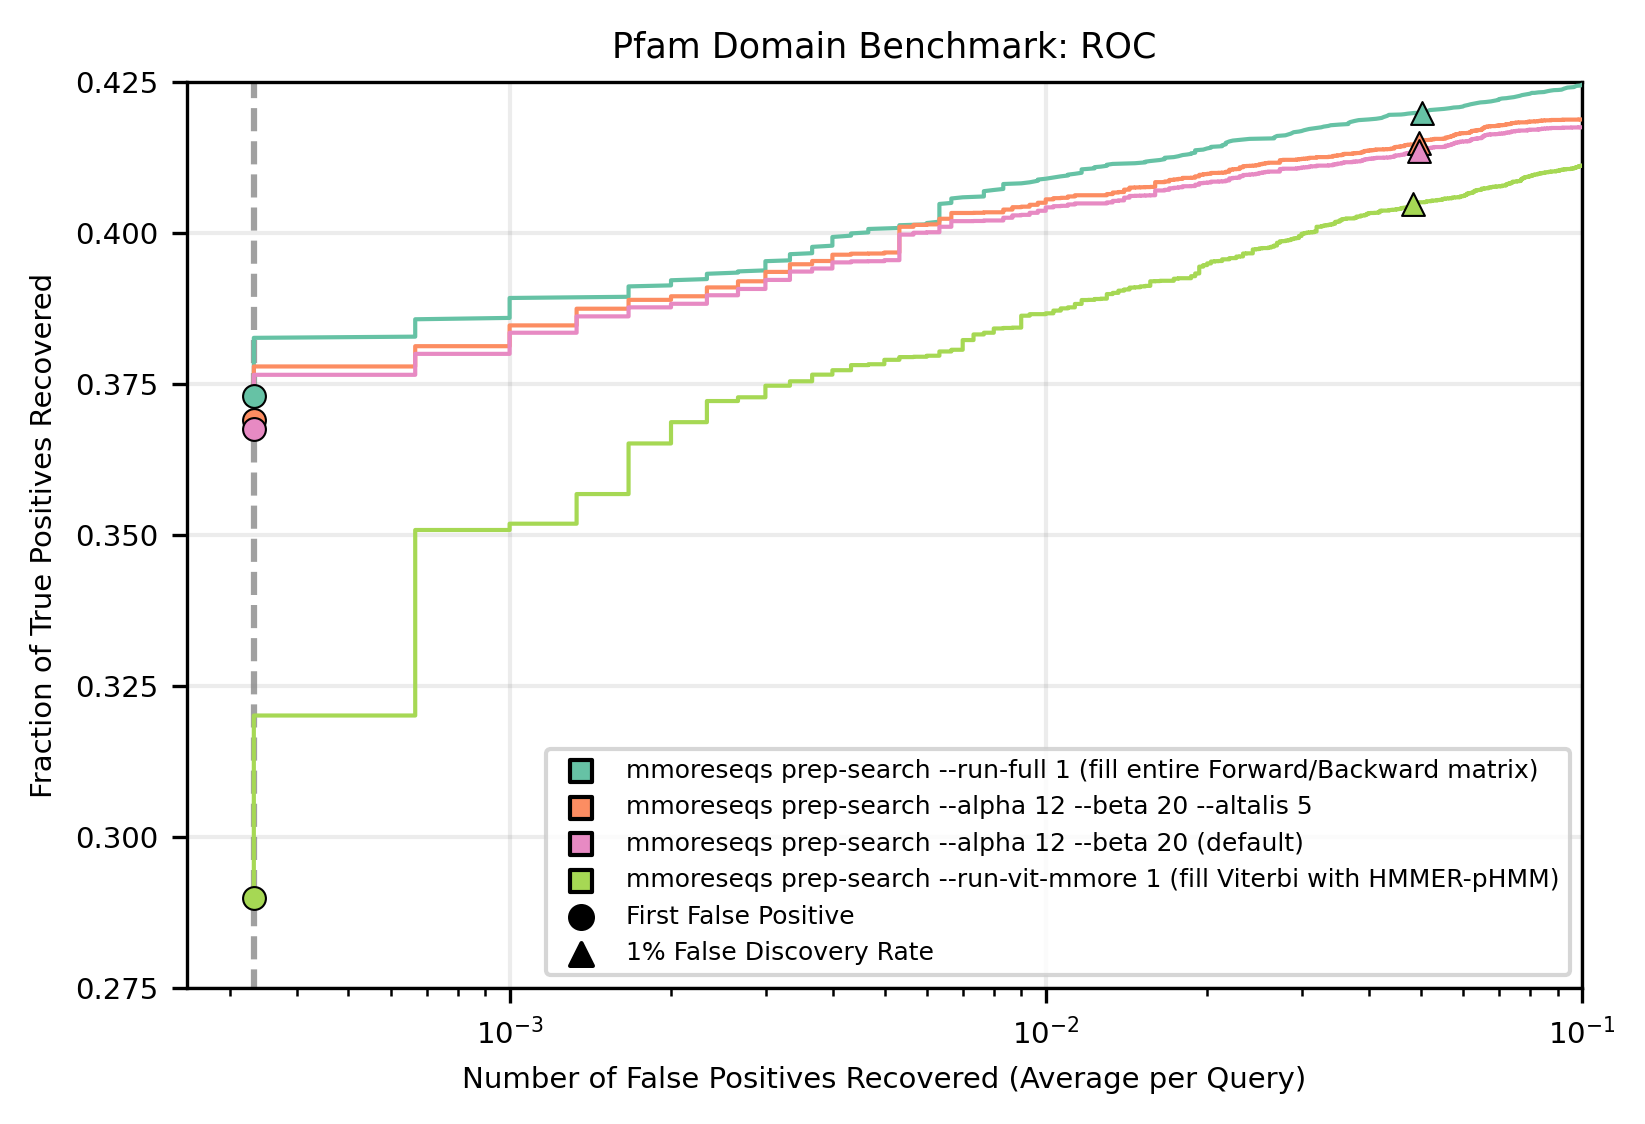

In [32]:
# select which to graph
# search_ids = [0,21,13,19,11,7,2]
# search_ids = [23, 19,18, 21,22, 11,7, 2]
# search_ids = [23, 27, 22, 25, 11, 7, 2]
search_ids = [23, 27, 22, 25]
# search_ids = [21,19,18,11,7,2]

# labels
matplotlib.rcParams.update({'font.size': 7})
plt.title('Pfam Domain Benchmark: ROC')
plt.ylabel('Fraction of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered (Average per Query)')
matplotlib.rcParams.update({'font.size': 6})

# first false positive
plt.plot( [1/total_query, 1/total_query], [-1, 2], color='gray', linewidth='1.5', linestyle='--', alpha=0.75, zorder=0 )

# total mmseqs prefilter TPs
plt.plot( [0, 1e10], [16299/total_TP, 16299/total_TP], color='pink', linewidth='1.5', linestyle='--', alpha=1.0 )

# # 1% false discovery rate (fp/tp = 0.01 => fp = tp * 0.01)
# y = np.linspace(0,1,51)
# plt.plot( y * 0.01, y, color='gray', linewidth='2.0', linestyle='--', alpha=0.6, zorder=0 ) 
# # 5% false discovery rate (fp/tp = 0.05 => fp = tp * 0.05)
# y = np.linspace(0,1,51)
# plt.plot( y * 0.05, y, color='gray', linewidth='2.0', linestyle='--', alpha=0.4, zorder=0 ) 

# color generator
color_iter = iter(cm.Set2(np.linspace( 0, 1, len(search_ids)+2 )))

# Percent TP Recovered vs Number FP Recovered
for x in search_ids:
    my_color = next(color_iter)
    x_data = datas[x][ datas[x]["tot_F"] > 0 ]
    plt.plot( x_data["roc_x"], x_data["roc_y"], color=my_color, linestyle="-", marker=None, linewidth=1.0, alpha=1, zorder=3 ) 
#     plt.plot( x_data["roc_x"], x_data["roc_y"], color='k', linestyle="-", marker=None, linewidth=3.0, alpha=1, zorder=1 ) 
    plt.scatter( auc_ffps[x][0], auc_ffps[x][1], color=my_color, marker='o', s=30, zorder=4, edgecolor='k', linewidth=0.5 ) 
    plt.scatter( auc_fdrs[x][0], auc_fdrs[x][1], color=my_color, marker='^', s=30, zorder=4, edgecolor='k', linewidth=0.5 ) 
    # add legend symbol
    plt.scatter( None, None, color=my_color, marker='s', s=30, zorder=4, edgecolor='k', linewidth=1, label=cmds[x] )
    
# symbols
plt.scatter( None, None, color='k', marker='o', s=30, zorder=4, edgecolor='k', linewidth=1, label='First False Positive' ) 
plt.scatter( None, None, color='k', marker='^', s=30, zorder=4, edgecolor='k', linewidth=1, label='1% False Discovery Rate' ) 
    
# gridlines
yticks = np.linspace(0,1,41)
plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.15)
plt.yticks(yticks)

# window
# plt.ylim(0.100, 0.650)
plt.ylim(0.275, 0.425)
# plt.ylim(0.325, 0.400)
plt.xlim(2.5e-4, 1e-1)
plt.xscale('log')

# legend
# plt.legend(loc='upper left', bbox_to_anchor=(1.05,1) )
plt.legend(loc='lower right')
    
plt.savefig("visuals/mybench-single_roc-plot.pdf", bbox_inches='tight')
plt.show()

In [23]:
for i in range(len(lookup)):
    print(i, lookup[i])

0 ('HMMER', 'norm')
1 ('HMMER', 'norm-e1e4')
2 ('MMSEQS', 'norm')
3 ('MMSEQS', 'norm-max1e3')
4 ('MMSEQS', 'norm-max1e4')
5 ('MMSEQS', 'sens')
6 ('MMSEQS', 'sens-max1e3')
7 ('MMSEQS', 'sens-max1e4')
8 ('MMSEQS', 'k80-max1e3')
9 ('MMSEQS', 'k70-max1e3')
10 ('MMSEQS', 'k60-max1e3')
11 ('MMORE', 'norm-pre')
12 ('MMORE', 'norm-8A12B')
13 ('MMORE', 'norm-12A20B')
14 ('MMORE', 'norm-16A28B')
15 ('MMORE', 'norm-8A12B-F1')
16 ('MMORE', 'norm-12A20B-F1')
17 ('MMORE', 'norm-16A28B-F1')
18 ('MMORE', 'norm-8A12B-F2')
19 ('MMORE', 'norm-12A20B-F2')
20 ('MMORE', 'norm-16A28B-F2')
21 ('MMORE', 'norm-8A12B-F3')
22 ('MMORE', 'norm-12A20B-F3')
23 ('MMORE', 'norm-FULL')
24 ('MMORE', 'norm-FULL-dom')
25 ('MMORE', 'viterbi')
26 ('MMORE', 'norm-12A16B-ALT3')
27 ('MMORE', 'norm-12A20B-ALT5')


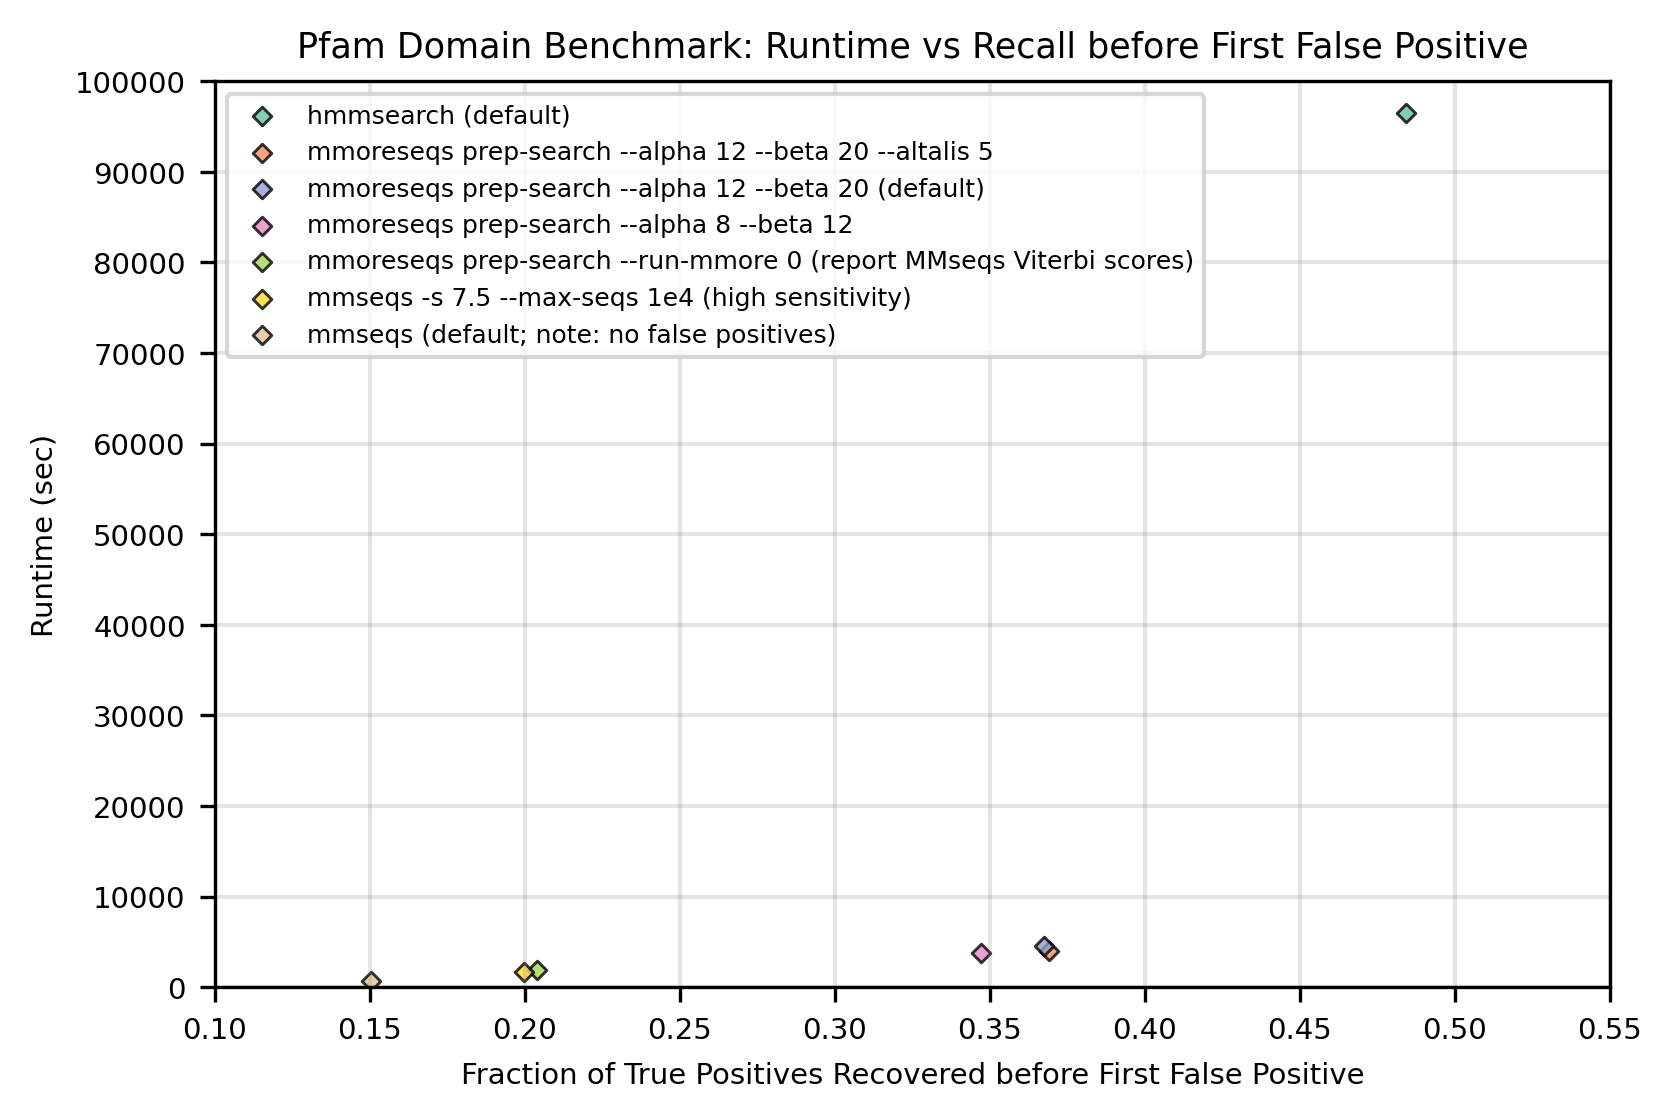

In [25]:
# which to graph
# search_ids = [0, 13,12, 16,15, 11,7,5,2]
# search_ids = [0, 16,15, 19,18,13, 11,7,5,2]
# search_ids = [0, 16,15, 11,7,5,2]
# search_ids = [0, 16,15, 19,18, 11,7,5,2, 10,9,8]
# search_ids = [0, 19,18, 21,22, 11,7,2]
search_ids = [0, 22,21, 11,7, 2]

# labels
matplotlib.rcParams.update({'font.size': 7})
plt.title('Pfam Domain Benchmark: Runtime vs Recall before First False Positive')
plt.ylabel('Runtime (sec)')
plt.xlabel('Fraction of True Positives Recovered before First False Positive')
matplotlib.rcParams.update({'font.size': 6})

# color generator
color_iter = iter(cm.Set2(np.linspace( 0, 1, 8 )))

# Runtime vs FFP
for x in search_ids:
    my_color = next(color_iter)
    plt.scatter( auc_ffps[x][1], runtimes[x], color=my_color, label=cmds[x], linestyle="-", edgecolor='k', linewidth=0.7, alpha=0.8, marker='D', s=10 )
#     plt.scatter( auc_fdrs[x][1], runtimes[x], color=my_color, label=labels[x], linestyle="-", edgecolor='k', linewidth=1.0, alpha=1.0, marker='^' )

# grid
xticks = np.linspace(0, 1, 20 + 1)
plt.xticks(xticks)
yticks = np.linspace(0, 100000, 10 + 1)
plt.yticks(yticks)
plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.2)
    
# window
# plt.yscale('log')
plt.xlim(0.1,0.55)
plt.ylim(0, 100000)

# legend
plt.legend(loc='upper left')
# plt.legend(loc='upper left', bbox_to_anchor=(1.05,1) )

plt.savefig("visuals/mybench-single_recall.pdf", bbox_inches='tight')
plt.show()

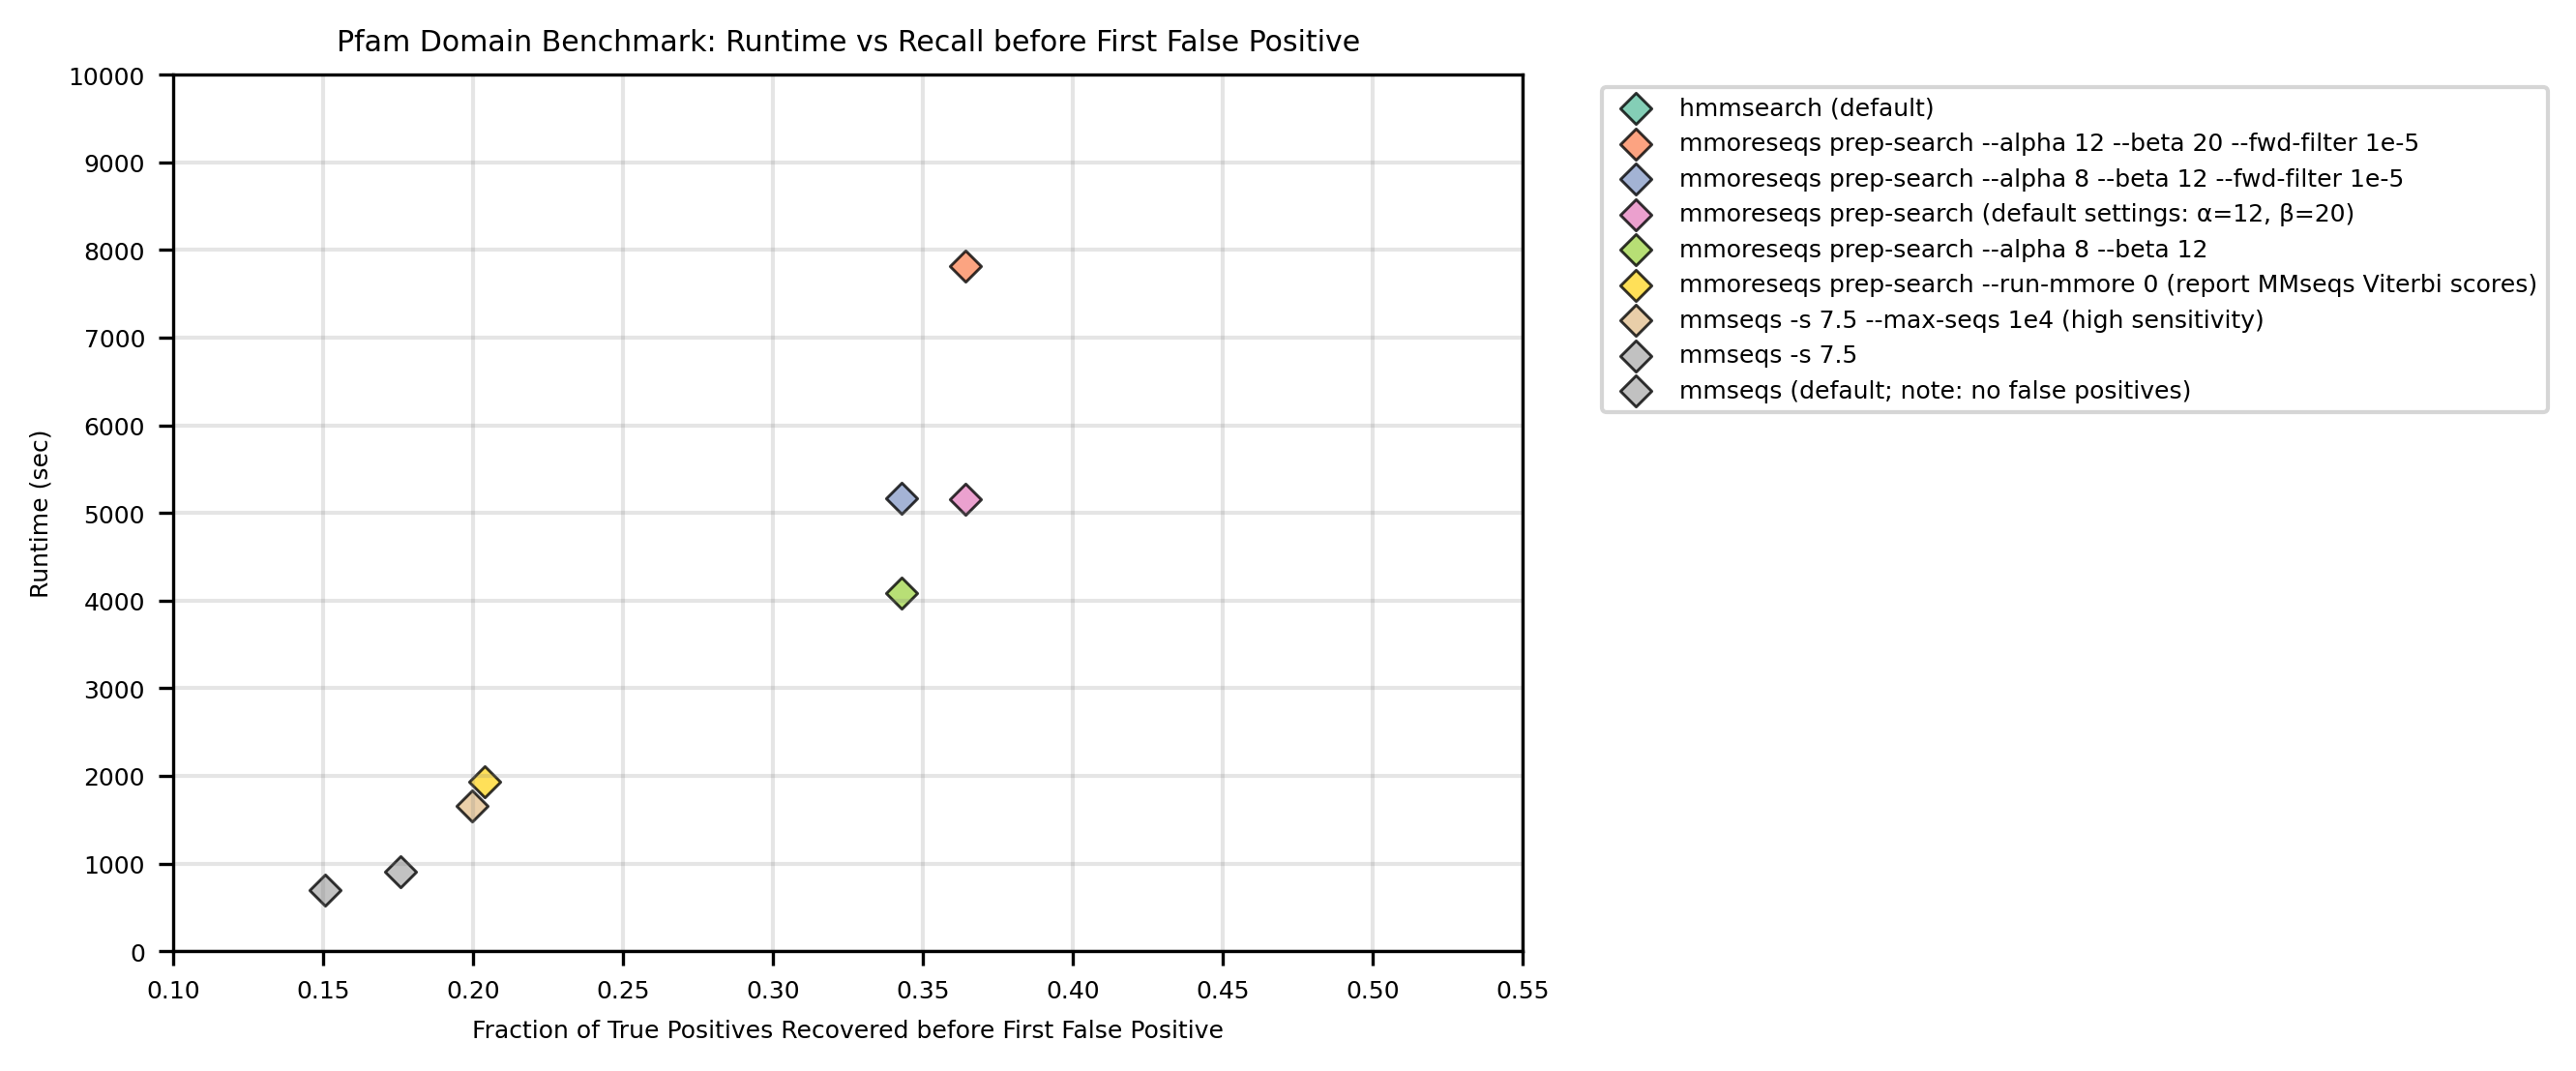

In [26]:
# which to graph
# search_ids = [0, 13,12, 16,15, 11,7,5,2]
# search_ids = [0, 16,15, 19,18,13, 11,7,5,2]
# search_ids = [0, 16,15, 11,7,5,2]
search_ids = [0, 16,15, 19,18, 11,7,5,2]
# search_ids = [0, 19,18, 11,7,2]

# labels
plt.title('Pfam Domain Benchmark: Runtime vs Recall before First False Positive')
plt.ylabel('Runtime (sec)')
plt.xlabel('Fraction of True Positives Recovered before First False Positive')

# color generator
color_iter = iter(cm.Set2(np.linspace( 0, 1, len(search_ids) )))

# Runtime vs FFP
for x in search_ids:
    my_color = next(color_iter)
    plt.scatter( auc_ffps[x][1], runtimes[x], color=my_color, label=cmds[x], linestyle="-", edgecolor='k', linewidth=0.7, alpha=0.8, marker='D', s=30 )
#     plt.scatter( auc_fdrs[x][1], runtimes[x], color=my_color, label=labels[x], linestyle="-", edgecolor='k', linewidth=1.0, alpha=1.0, marker='^' )

# grid
xticks = np.linspace(0, 1, 20 + 1)
plt.xticks(xticks)
yticks = np.linspace(0, 10000, 10 + 1)
plt.yticks(yticks)
plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.2)
    
# window
# plt.yscale('log')
plt.xlim(0.1,0.55)
plt.ylim(0, 10000)

# legend
# plt.legend(loc='upper left')
plt.legend(loc='upper left', bbox_to_anchor=(1.05,1) )

# plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.jpg")
plt.show()